# Classify characters in scikit-learn

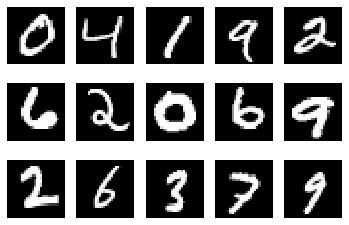

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import matplotlib.cm as cm

mnist = fetch_openml('mnist_784')

counter = 1
for i in range(1, 4):
    for j in range (1, 6):
        plt.subplot(3, 5, counter)
        plt.imshow(mnist.data[(i - 1) * 8000 + j].reshape((28, 28)), cmap=cm.Greys_r)
        plt.axis('off')
        counter += 1
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X, y = mnist.data, mnist.target
X = X/255.0*2-1
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

pipeline = Pipeline([
    ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=2, verbose=1, scoring='accuracy')
grid_search.fit(X_train[:10000], y_train[:10000])
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))
    
predictions = grid_search.predict(X_test)
print(classification_report(y_test, predictions))